In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import impute
from sklearn.datasets import make_regression
from sklearn import model_selection
from sklearn import metrics
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import datasets
from matplotlib import pyplot as plt

In [7]:
dataset = datasets.load_dataset("scikit-learn/adult-census-income", split="train", cache_dir="../../.datasets")
dataset.info

DatasetInfo(description='', citation='', homepage='', license='', features={'age': Value('int64'), 'workclass': Value('string'), 'fnlwgt': Value('int64'), 'education': Value('string'), 'education.num': Value('int64'), 'marital.status': Value('string'), 'occupation': Value('string'), 'relationship': Value('string'), 'race': Value('string'), 'sex': Value('string'), 'capital.gain': Value('int64'), 'capital.loss': Value('int64'), 'hours.per.week': Value('int64'), 'native.country': Value('string'), 'income': Value('string')}, post_processed=None, supervised_keys=None, builder_name='csv', dataset_name='adult-census-income', config_name='default', version=0.0.0, splits={'train': SplitInfo(name='train', num_bytes=5316802, num_examples=32561, shard_lengths=None, dataset_name='adult-census-income')}, download_checksums={'hf://datasets/scikit-learn/adult-census-income@fbeef6ec0e6fd88a5028b94683144000a6b380d5/adult.csv': {'num_bytes': 4104734, 'checksum': None}}, download_size=4104734, post_proces

In [8]:
df = dataset.to_pandas()

In [9]:
cols_with_int64_dtype = [cols for cols in df.columns if df[cols].dtype == 'int64']
cols_with_int64_dtype

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

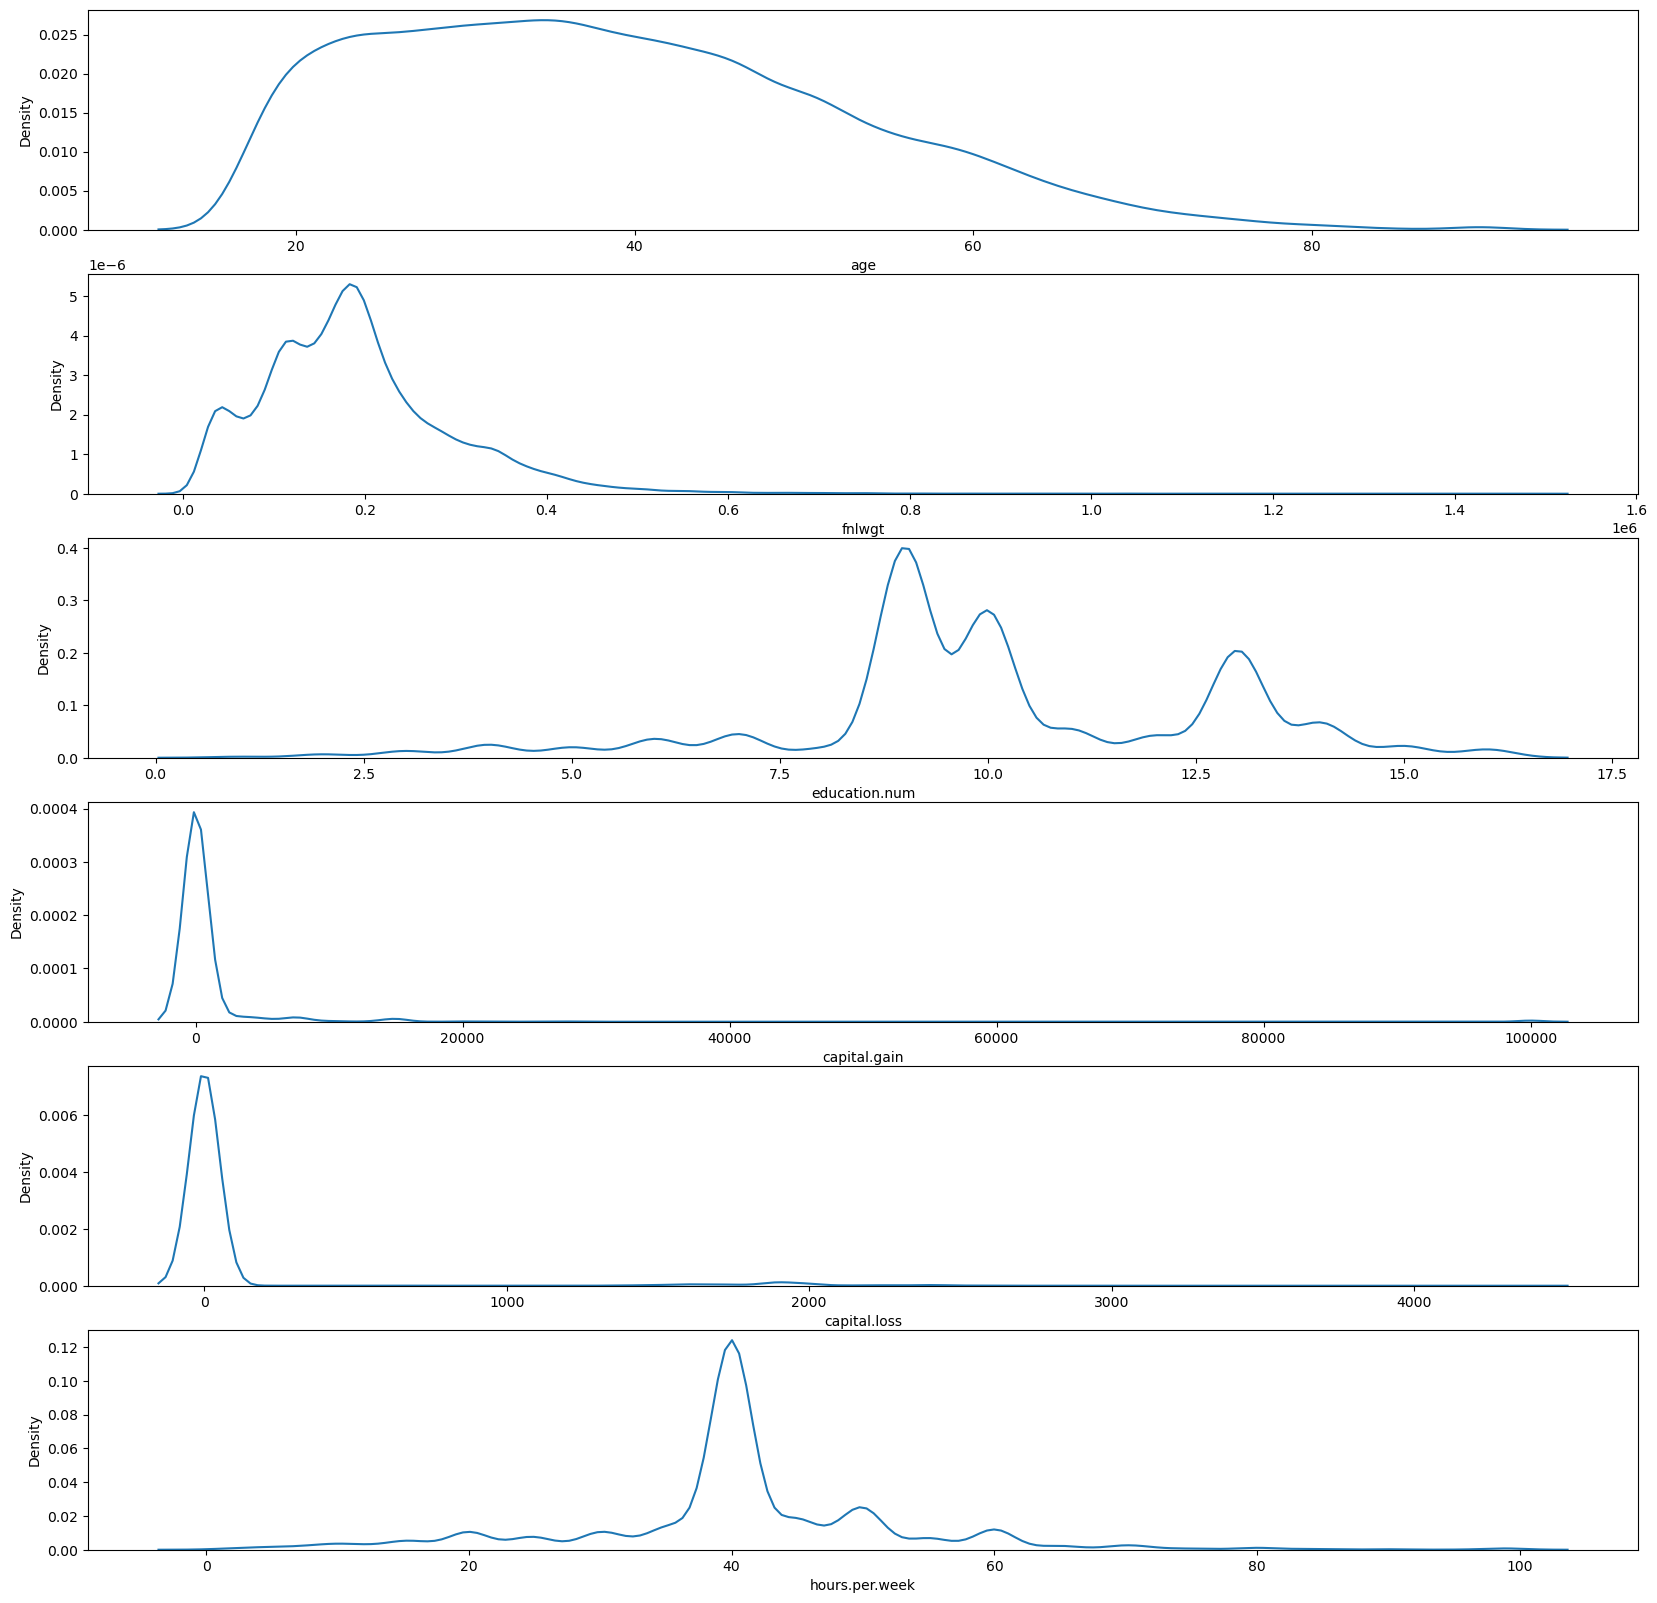

In [10]:
fig, axes = plt.subplots(6, 1, figsize=(20, 20))
for col, ax in zip(cols_with_int64_dtype, axes):
  sns.kdeplot(df, x=col, ax=ax)

In [11]:
df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [12]:
numeric_columns = df.select_dtypes(include=['int64', 'float64', 'float32']).columns
categoric_columns = df.select_dtypes(include=['object']).columns.drop("income")

# Removes any empty values such as NaN
imputer = impute.SimpleImputer(strategy='most_frequent')
df[categoric_columns] = imputer.fit_transform(df[categoric_columns])

scalar = preprocessing.MinMaxScaler()
onehotencoder = preprocessing.OneHotEncoder(drop='first')

df[numeric_columns] = scalar.fit_transform(df[numeric_columns])
encoded = onehotencoder.fit_transform(df[categoric_columns])
encoded_dense = encoded.toarray()
# Create new column names
encoded_cols = onehotencoder.get_feature_names_out(categoric_columns)
# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_dense, columns=encoded_cols, index=df.index)
# Drop original categorical columns and concat
df = df.drop(categoric_columns, axis=1)
df = pd.concat([df, encoded_df], axis=1)

df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})

df = df.dropna()

X = df.drop("income", axis=1)
y = df["income"]

In [13]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,1.000000,0.043987,0.533333,0.0,1.000000,0.397959,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,1.000000,0.173469,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,1.000000,0.397959,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.895317,0.397959,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.895317,0.397959,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,0.0,0.000000,0.397959,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.136986,0.166404,0.733333,0.0,0.000000,0.377551,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.315068,0.096500,0.533333,0.0,0.000000,0.397959,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.000000,0.397959,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, random_state=55)

In [15]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred = logistic_reg.predict(X_test)

accuracy = sum([1 for i, label in enumerate(y_pred) if label == y_test.values[i]])
print(accuracy/len(y_test.values))

0.8532391771568928


In [ ]:
accuracy_score = metrics.accuracy_score(y_pred, y_test)


0.8532391771568928